In [ ]:
!python --version

Python 3.10.12


In [ ]:
CAMINHO = 'https://raw.githubusercontent.com/bruno-kalel/reducao-dimensionalidade/main/reducao-dimensionalidade.csv'

In [ ]:
import pandas

In [ ]:
from numpy import random

In [ ]:
from sklearn.model_selection import train_test_split as t_t_s

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
classificador = RFC(n_estimators=100)

In [ ]:
from sklearn.dummy import DummyClassifier as DC

In [ ]:
import seaborn

In [ ]:
import matplotlib.pyplot

In [ ]:
from sklearn.preprocessing import StandardScaler as SS
padronizador = SS()

In [ ]:
from sklearn.feature_selection import SelectKBest as SKB

In [ ]:
from sklearn.feature_selection import chi2 as c2

In [ ]:
from sklearn.metrics import confusion_matrix as c_m

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.manifold import TSNE

# Dados com muitas dimensões

In [ ]:
resultados_exames = pandas.read_csv(CAMINHO)

In [ ]:
resultados_exames.head(10)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440,0.804347
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750,NaN


In [ ]:
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnóstico = resultados_exames['diagnostico']

In [ ]:
resultados_exames.isna().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
valores_exames_v1 = valores_exames.drop(columns='exame_33')

In [ ]:
SEED = 123143
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = t_t_s(valores_exames_v1, diagnóstico, test_size=0.3)

In [ ]:
classificador.fit(treino_x, treino_y)
classificador.score(teste_x, teste_y)

0.9239766081871345

## Validando um valor base (baseline)

In [ ]:
SEED = 123143
random.seed(SEED)

classificador_bobo = DC(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)
classificador_bobo.score(teste_x, teste_y)

0.6666666666666666

# Avançando e explorando dados

In [ ]:
valores_exames_v1.head(10)

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750


In [ ]:
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
valores_exames_v2 = pandas.DataFrame(data=valores_exames_v2, columns=valores_exames_v1.keys())

In [ ]:
dados_plot = pandas.concat([diagnóstico, valores_exames_v2.iloc[:,0:5]], axis='columns')
dados_plot = pandas.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')
dados_plot.head(10)

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297
5,M,exame_1,-0.476375
6,M,exame_1,1.170908
7,M,exame_1,-0.118517
8,M,exame_1,-0.320167
9,M,exame_1,-0.473535


<Axes: xlabel='exames', ylabel='valores'>

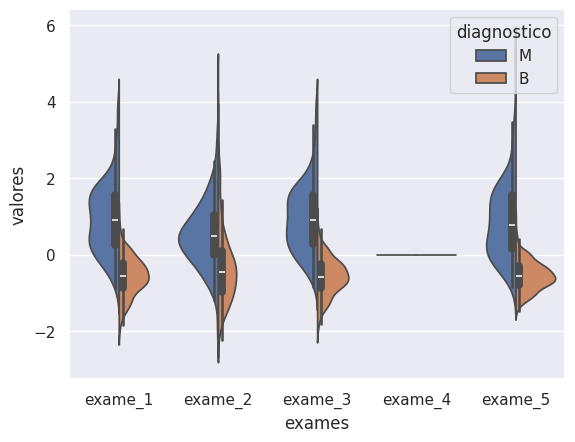

In [ ]:
seaborn.violinplot(x='exames', y='valores', hue='diagnostico', data=dados_plot, split=True)

In [ ]:
# valores constantes, eliminar feature
valores_exames_v1['exame_4'].unique()

array([103.78])

In [ ]:
# valores constantes, eliminar feature
valores_exames_v2['exame_4'].unique()

array([1.42108547e-14])

In [ ]:
def violino(valores, inicio, fim):

  dados_plot = pandas.concat([diagnóstico, valores.iloc[:, inicio:fim]], axis=1)
  dados_plot = pandas.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

  seaborn.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True)

  matplotlib.pyplot.xticks(rotation=90)

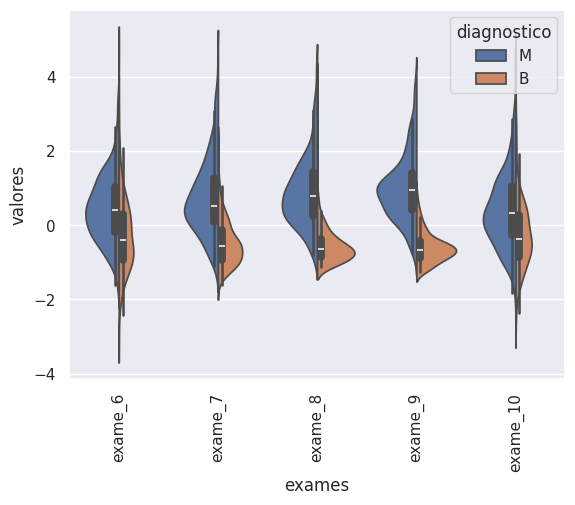

In [ ]:
violino(valores_exames_v2, 5, 10)

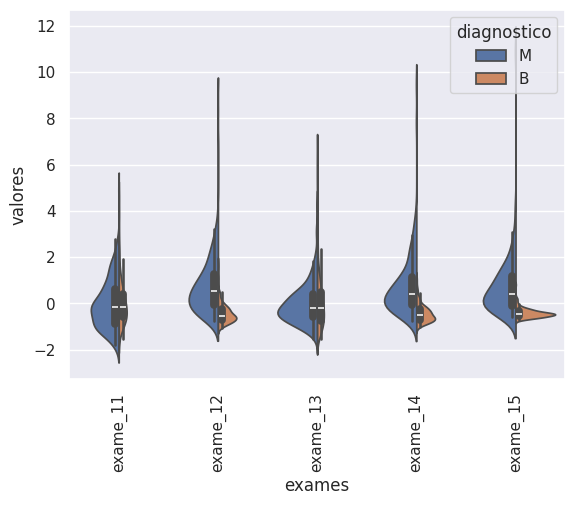

In [ ]:
violino(valores_exames_v2, 10, 15)

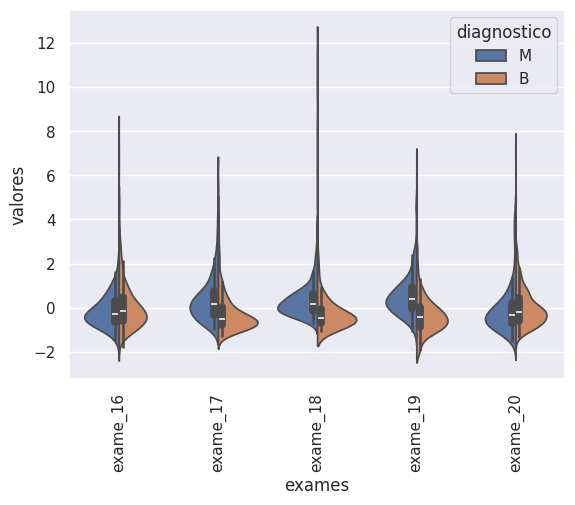

In [ ]:
violino(valores_exames_v2, 15, 20)

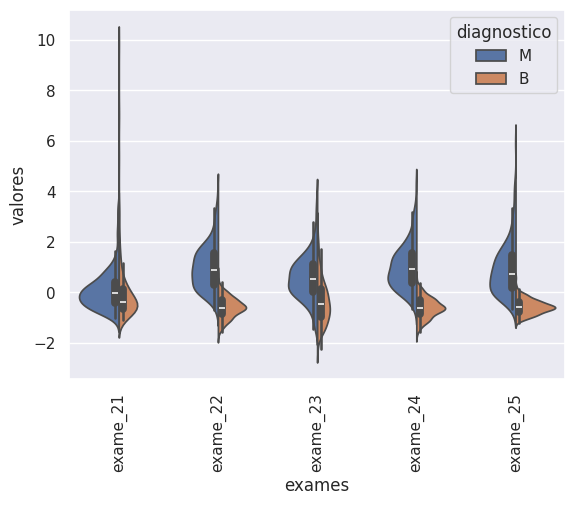

In [ ]:
violino(valores_exames_v2, 20, 25)

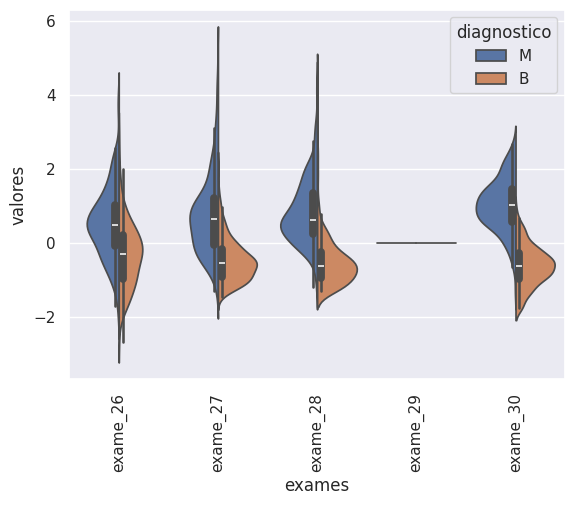

In [ ]:
violino(valores_exames_v2, 25, 30)

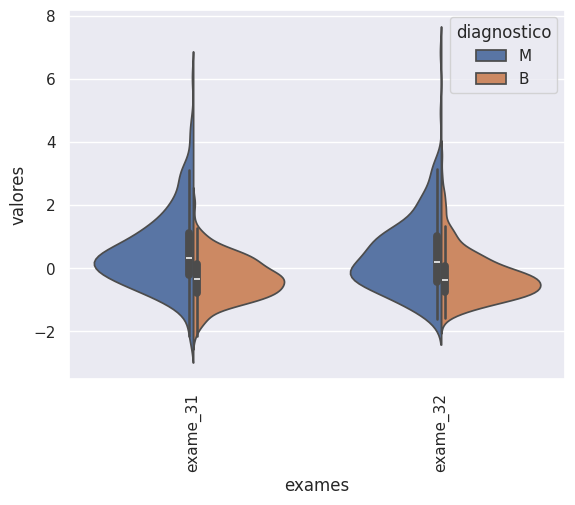

In [ ]:
violino(valores_exames_v2, 30, 50)

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'])

In [ ]:
def classificar(valores):
  SEED = 1234
  random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = t_t_s(valores, diagnóstico, test_size=0.3)

  classificador.fit(treino_x, treino_y)
  print(classificador.score(teste_x, teste_y))

In [ ]:
classificar(valores_exames_v3)

0.9298245614035088


# Dados correlacionados

In [ ]:
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
'🤯'

'🤯'

<Axes: >

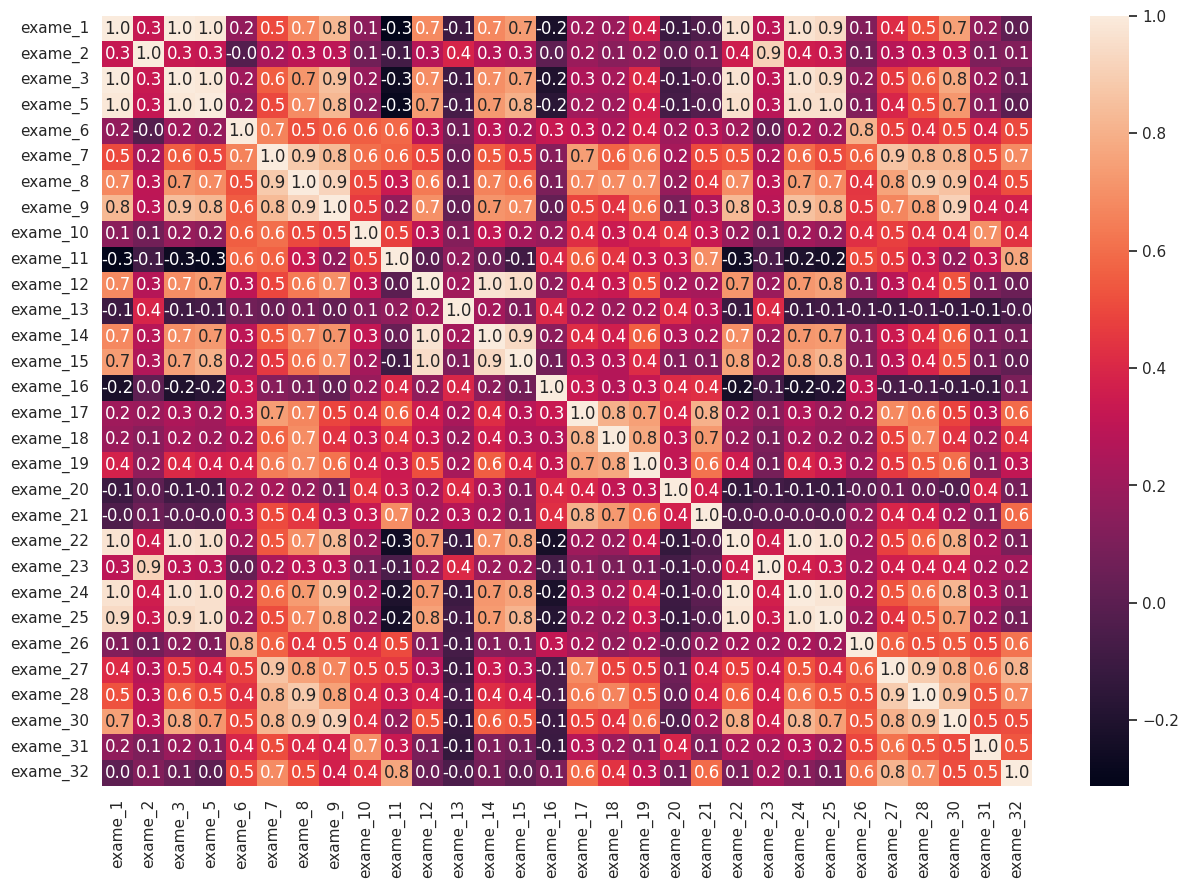

In [ ]:
matplotlib.pyplot.figure(figsize=(15, 10))
seaborn.heatmap(valores_exames_v3.corr(), annot=True, fmt='.1f')

In [ ]:
variáveis_correlacionadas = valores_exames_v3.corr()
variáveis_correlacionadas

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
variáveis_correlacionadas_v1 = variáveis_correlacionadas[variáveis_correlacionadas > 0.99]
variáveis_correlacionadas_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
variáveis_correlacionadas_v2 = variáveis_correlacionadas_v1.sum()
variáveis_correlacionadas_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
variáveis_correlacionadas_v3 = variáveis_correlacionadas_v2[variáveis_correlacionadas_v2 > 1]
variáveis_correlacionadas_v3

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns=[key for key in variáveis_correlacionadas_v3.keys()], axis=1)
valores_exames_v4.columns

Index(['exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8', 'exame_9',
       'exame_10', 'exame_11', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [ ]:
classificar(valores_exames_v4)

0.9181286549707602


In [ ]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'], axis=1)
valores_exames_v5.columns

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_11', 'exame_12', 'exame_13', 'exame_14',
       'exame_15', 'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20',
       'exame_21', 'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27',
       'exame_28', 'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

In [ ]:
classificar(valores_exames_v5)

0.9298245614035088


In [ ]:
valores_exames_v5.shape[1]

28

# Automatizando a seleção

In [ ]:
selecionar_kmelhores = SKB(c2, k=5)

In [ ]:
valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

In [ ]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = t_t_s(valores_exames_v6, diagnóstico, test_size=0.3)

In [ ]:
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [ ]:
treino_kbest.shape[1]

5

In [ ]:
teste_kbest.shape[1]

5

In [ ]:
classificador = RFC(n_estimators=100, random_state=1234)

In [ ]:
classificador.fit(treino_kbest, treino_y)
classificador.score(teste_kbest, teste_y)

0.9239766081871345

# Matriz de confusão

In [ ]:
matriz_confusão = c_m(teste_y, classificador.predict(teste_kbest))
matriz_confusão

array([[100,   5],
       [  8,  58]])

[Text(0.5, 19.049999999999997, 'predição'), Text(46.25, 0.5, 'real')]

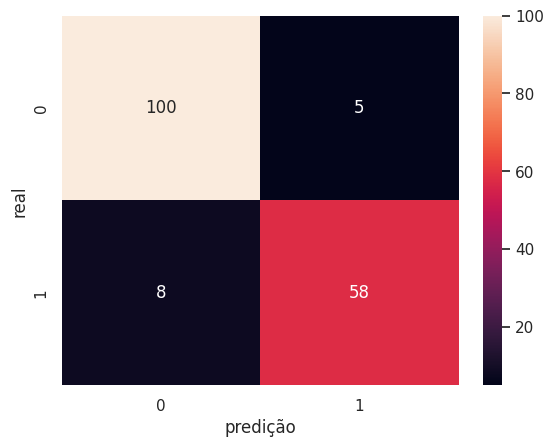

In [ ]:
seaborn.set(font_scale=1)
seaborn.heatmap(matriz_confusão, annot=True, fmt='d').set(xlabel='predição', ylabel='real')

In [ ]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = t_t_s(valores_exames_v6, diagnóstico, test_size=0.3)

In [ ]:
classificador = RFC(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

RandomForestClassifier(random_state=1234)

In [ ]:
selecionador_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

In [ ]:
classificador.fit(treino_rfe, treino_y)

RandomForestClassifier(random_state=1234)

In [ ]:
matriz_confusão = c_m(teste_y, classificador.predict(teste_rfe))
matriz_confusão

array([[100,   5],
       [ 12,  54]])

[Text(0.5, 19.049999999999997, 'predição'), Text(46.25, 0.5, 'real')]

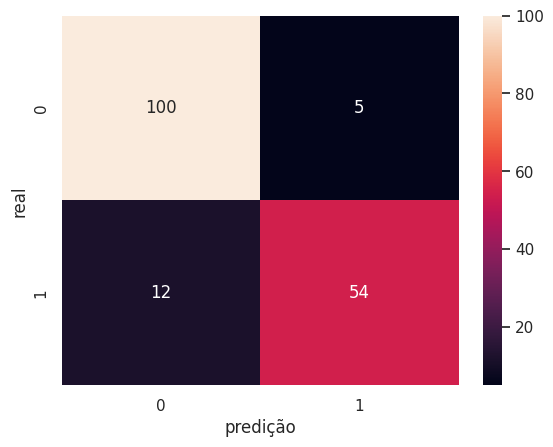

In [ ]:
seaborn.set(font_scale=1)
seaborn.heatmap(matriz_confusão, annot=True, fmt='d').set(xlabel='predição', ylabel='real')

# Visualizando os dados no plano

In [ ]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = t_t_s(valores_exames_v6, diagnóstico, test_size=0.3)

In [ ]:
classificador = RFC(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)

RandomForestClassifier(random_state=1234)

In [ ]:
selecionador_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring='accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

In [ ]:
classificador.fit(treino_rfecv, treino_y)

RandomForestClassifier(random_state=1234)

In [ ]:
matriz_confusão = c_m(teste_y, classificador.predict(teste_rfecv))
matriz_confusão

array([[103,   2],
       [ 10,  56]])

[Text(0.5, 19.049999999999997, 'predição'), Text(46.25, 0.5, 'real')]

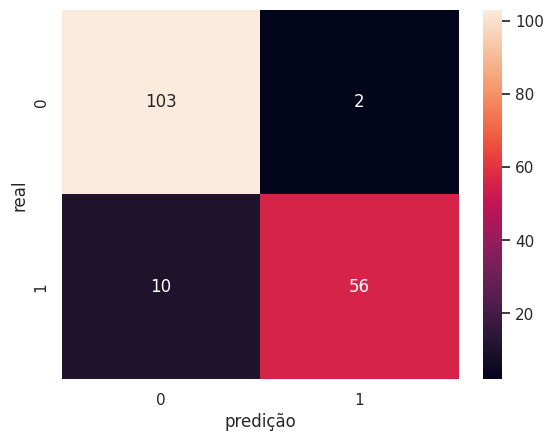

In [ ]:
seaborn.set(font_scale=1)
seaborn.heatmap(matriz_confusão, annot=True, fmt='d').set(xlabel='predição', ylabel='real')

In [ ]:
selecionador_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

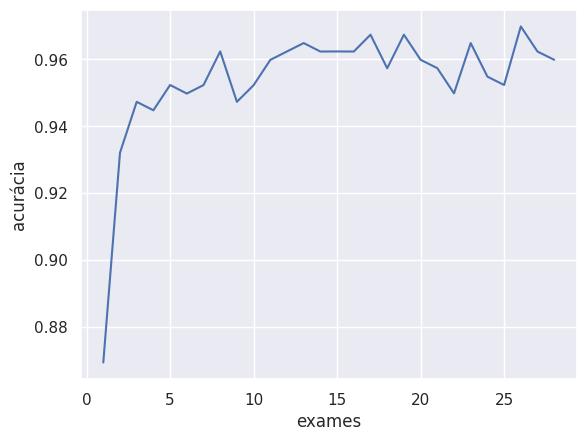

In [ ]:
matplotlib.pyplot.xlabel('exames')
matplotlib.pyplot.ylabel('acurácia')
matplotlib.pyplot.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
matplotlib.pyplot.show()

In [ ]:
resultados_exames

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [ ]:
pca = PCA(n_components=2)

In [ ]:
valores_exames_pca = pca.fit_transform(valores_exames_v6)

In [ ]:
valores_exames_pca

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

<Axes: >

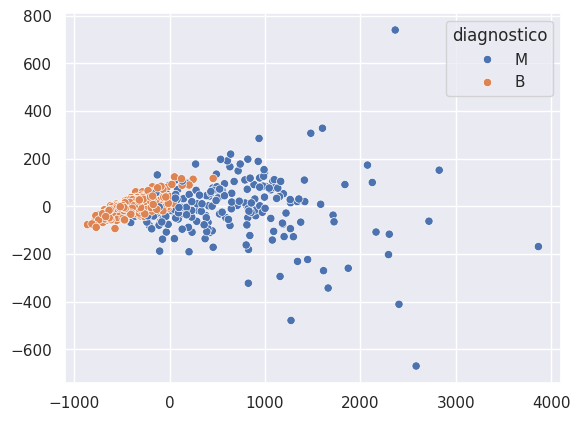

In [ ]:
seaborn.scatterplot(x=valores_exames_pca[:, 0], y=valores_exames_pca[:, 1], hue=diagnóstico)

In [ ]:
valores_exames_pca_normalizado = pca.fit_transform(valores_exames_v5)

<Axes: >

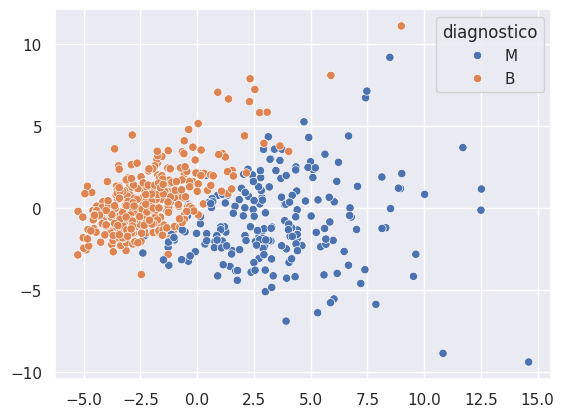

In [ ]:
seaborn.scatterplot(x=valores_exames_pca_normalizado[:, 0], y=valores_exames_pca_normalizado[:, 1], hue=diagnóstico)

In [ ]:
tsne = TSNE(n_components=2)

In [ ]:
valores_exames_tsne = tsne.fit_transform(valores_exames_v5)

<Axes: >

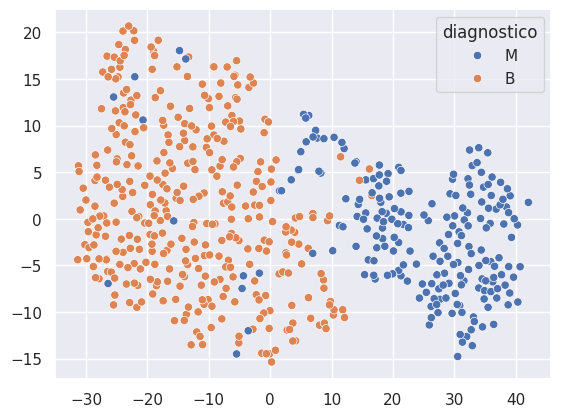

In [ ]:
seaborn.scatterplot(x=valores_exames_tsne[:, 0], y=valores_exames_tsne[:, 1], hue=diagnóstico)